# Introduction to Business Analytics



Participants: 

- Elli Georgiou: s223408
- Maria Katarachia: s213633
- Stavroula Douva: s222652
- Michail-Achillefs Katarachias: s222653 
- Dimitris Voukatas: s230148



# Table of Content
Section 1: **Introduction + Data Analysis \& Visualizations**<br> <br>
Section 2: **Prediction models**<br> <br>
Section 3: **Exploratory Component** <br> <br>
Section 4: **Conclusions**<br> <br>

# Section 1 : Introduction and Data Analysis and Visualizations

In this first section, we embark on the analysis of our dataframe, aiming to transform it into a higher-quality set that can provide meaningful insights for the subsequent phases of this project. The first crucial step involves preprocessing, which includes cleaning and organizing the dataset.

Cleaning is of paramount importance, encompassing tasks such as handling missing values, removing duplicates, and addressing outliers. These actions ensure that the data is reliable and free from errors, setting the foundation for robust analysis.

Following this approach, we filter the data based on relevant criteria. For instance, we seek data that adheres to logical parameters; for example, age should fall within a specific range, trip duration should follow a consistent format, and station locations must be within the boundaries of New York territory.

Once the data is cleaned and preprocessed, visualization emerges as a powerful tool for gaining initial insights. Visual representations, such as histograms, scatter plots, and correlation matrices, offer a holistic view, unveiling potential patterns, trends, or relationships throughout the dataset.

## Setup

Firstly, we import all the libraries that will be used in this project.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#import torch
#import torch.nn as nn
#import torch.optim as optim
from time import time

import warnings
warnings.filterwarnings('ignore')
###

## Data importing

We open the file and create a folder for our plots as well.

In [3]:
file_path = 'Trips_2018.csv'

if not os.path.exists('plots'):
    os.makedirs('plots')

with open(file_path, 'r') as f:
    df = pd.read_csv(f)

# Data cleaning 

Let's take a look at how our dataframe appears.

In [4]:
df.head()


,Unnamed: 0,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
0,0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1
1,1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1
2,2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1
3,3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1
4,4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1


In [5]:
# We are checking the data types of our dataframe to see that are on the appropiate type and also the dimensions of our dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17548339 entries, 0 to 17548338
Data columns (total 14 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Unnamed: 0               int64  
 1   tripduration             int64  
 2   starttime                object 
 3   stoptime                 object 
 4   start_station_id         float64
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_latitude     float64
 9   end_station_longitude    float64
 10  bikeid                   int64  
 11  usertype                 object 
 12  birth_year               int64  
 13  gender                   int64  
dtypes: float64(6), int64(5), object(3)
memory usage: 1.8+ GB


In [6]:
# We are dropping the first column because it is just an index.
df = df.drop(df.columns[0], axis=1) 
#df = df.sample(n=10000, random_state=42)

## Missing values

In [8]:
# We check if there are any null values in our dataframe.
df.isnull().sum()



tripduration                  0
starttime                     0
stoptime                      0
start_station_id           2497
start_station_latitude        0
start_station_longitude       0
end_station_id             2497
end_station_latitude          0
end_station_longitude         0
bikeid                        0
usertype                      0
birth_year                    0
gender                        0
dtype: int64

In [9]:
# We also check that there are no duplicates.
df.duplicated().sum()

0

In [9]:
# We remove null values for start_station_id and end_station_id.
df = df[pd.to_numeric(df['start_station_id'], errors='coerce').notnull()]
df = df[pd.to_numeric(df['end_station_id'], errors='coerce').notnull()]


In [10]:
# One more time we check our dataframe.
df.tail(10)

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
17548329,798,2018-12-31 23:49:37.0590,2019-01-01 00:02:55.1640,518.0,40.747804,-73.973442,3709.0,40.738046,-73.996430,35603,Subscriber,1982,1
17548330,312,2018-12-31 23:49:43.9520,2018-12-31 23:54:56.2510,3166.0,40.780578,-73.985624,3164.0,40.777057,-73.978985,27419,Subscriber,1960,1
17548331,165,2018-12-31 23:50:34.6070,2018-12-31 23:53:20.5830,498.0,40.748549,-73.988084,472.0,40.745712,-73.981948,20190,Subscriber,1994,2
17548332,1027,2018-12-31 23:51:13.9220,2019-01-01 00:08:21.7900,423.0,40.765849,-73.986905,285.0,40.734546,-73.990741,28510,Subscriber,1981,1
17548333,174,2018-12-31 23:53:59.0720,2018-12-31 23:56:53.4750,260.0,40.703652,-74.011678,260.0,40.703652,-74.011678,33887,Subscriber,1980,1
17548334,734,2018-12-31 23:55:06.9910,2019-01-01 00:07:21.2300,336.0,40.730477,-73.999061,379.0,40.749156,-73.991600,27111,Subscriber,1986,1
17548335,2551,2018-12-31 23:55:44.3070,2019-01-01 00:38:15.7820,3320.0,40.794067,-73.962868,2006.0,40.765909,-73.976342,16390,Customer,1969,0
17548336,2376,2018-12-31 23:56:52.8500,2019-01-01 00:36:29.2860,427.0,40.701907,-74.013942,259.0,40.701221,-74.012342,34398,Subscriber,1979,1
17548337,2758,2018-12-31 23:58:29.2120,2019-01-01 00:44:27.5170,3320.0,40.794067,-73.962868,281.0,40.764397,-73.973715,30818,Customer,1969,0
17548338,2459,2018-12-31 23:59:51.0850,2019-01-01 00:40:50.8800,128.0,40.727103,-74.002971,402.0,40.740343,-73.989551,34775,Subscriber,1996,2


## Formating

After finishing the first stage of clearance, we want to have the right format for our time objects before proceeding with more processing afterward.

In [11]:
# Convert start_time and end_time columns to datetime format.
df['starttime'] = pd.to_datetime(df['starttime'])
df['stoptime'] = pd.to_datetime(df['stoptime'])


# Extract hour and date from start and stop times
df['start_hour'] = df['starttime'].dt.hour
df['start_date'] = df['starttime'].dt.date
df['stop_hour'] = df['stoptime'].dt.hour
df['stop_date'] = df['stoptime'].dt.date
df['day_of_week'] = df['starttime'].dt.dayofweek

## Filtering

In [12]:
# Drop any rows with negative trip durations.
df = df[df['tripduration'] > 0]

# Drop any rows with trip durations greater than 24 hours.
df = df[df['tripduration'] <= 86400]

# Drop rows that are outside the 99th percentile of trip durations.
df = df[df['tripduration'] <= df['tripduration'].quantile(.99)]

# Drop rows where the birth_year is outside the lower 99th percentile of birth years.
df = df[df['birth_year'] >= df['birth_year'].quantile(.01)]

# Drop rows where the gender is not 0, 1 or 2.
df = df[df['gender'].isin([0, 1, 2])]


In [13]:
# We observe the statistics of our dataframe.
df.describe()


,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,birth_year,gender,start_hour,stop_hour,day_of_week
count,1.719797e+07,17197969,17197969,1.719797e+07,1.719797e+07,1.719797e+07,1.719797e+07,1.719797e+07,1.719797e+07,1.719797e+07,1.719797e+07,1.719797e+07,1.719797e+07,1.719797e+07,1.719797e+07
mean,7.763461e+02,2018-07-16 04:40:34.797161728,2018-07-16 04:53:31.648544256,1.587863e+03,4.073727e+01,-7.398261e+01,1.578785e+03,4.073695e+01,-7.398283e+01,2.657340e+04,1.979383e+03,1.152542e+00,1.389216e+01,1.404125e+01,2.841132e+00
min,6.100000e+01,2018-01-01 00:01:50.650000,2018-01-01 00:05:07.438000,7.200000e+01,4.064654e+01,-7.402535e+01,7.200000e+01,4.064654e+01,-7.406661e+01,1.452900e+04,1.950000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.560000e+02,2018-05-08 19:31:56.023000064,2018-05-08 19:46:38.684000,3.820000e+02,4.071755e+01,-7.399521e+01,3.800000e+02,4.071755e+01,-7.399595e+01,2.031300e+04,1.969000e+03,1.000000e+00,1.000000e+01,1.000000e+01,1.000000e+00
50%,5.990000e+02,2018-07-19 17:13:06.976999936,2018-07-19 17:27:54.185999872,5.050000e+02,4.073818e+01,-7.398565e+01,5.040000e+02,4.073756e+01,-7.398621e+01,2.828300e+04,1.982000e+03,1.000000e+00,1.500000e+01,1.500000e+01,3.000000e+00
75%,1.040000e+03,2018-09-27 16:54:18.383000064,2018-09-27 17:08:16.212000,3.249000e+03,4.075757e+01,-7.397283e+01,3.249000e+03,4.075715e+01,-7.397344e+01,3.185800e+04,1.989000e+03,1.000000e+00,1.800000e+01,1.800000e+01,4.000000e+00
max,3.463000e+03,2018-12-31 23:59:51.085000,2019-01-01 00:44:27.517000,3.721000e+03,4.550636e+01,-7.356891e+01,3.721000e+03,4.550636e+01,-7.356891e+01,3.583100e+04,2.002000e+03,2.000000e+00,2.300000e+01,2.300000e+01,6.000000e+00
std,5.745141e+02,NaN,NaN,1.439321e+03,3.197921e-02,1.910248e-02,1.438431e+03,3.175651e-02,1.917265e-02,6.219151e+03,1.134457e+01,5.402702e-01,4.864178e+00,4.903548e+00,1.928603e+00


# Visualizations

We visualize our data to gain useful insights.

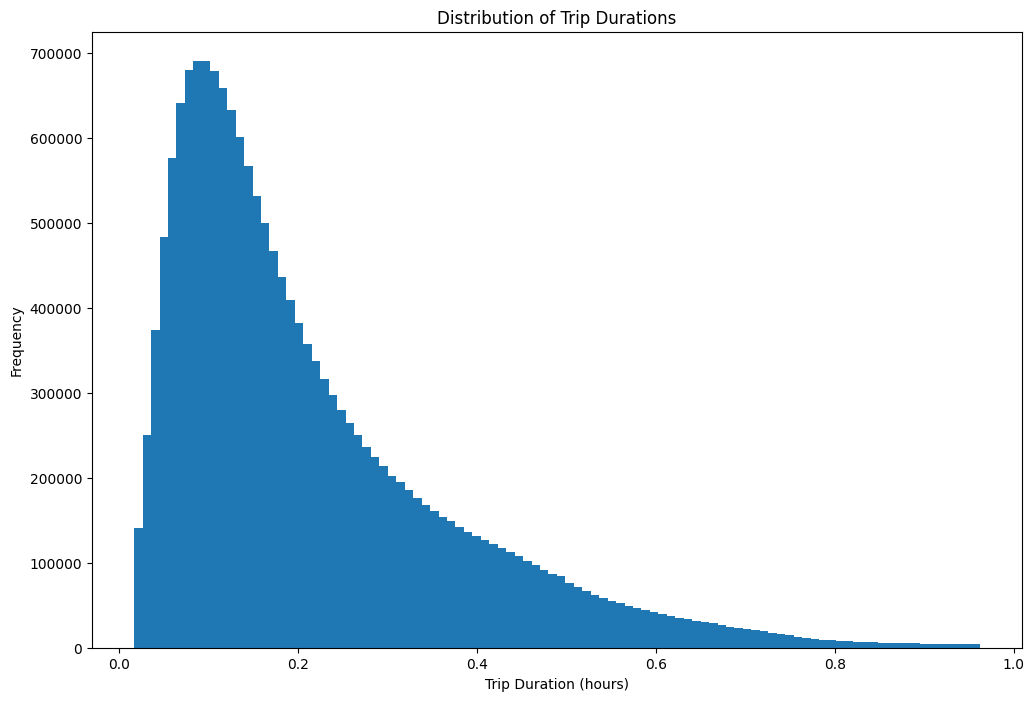

In [67]:
# Distribution of trip durations
plt.figure(figsize=(12, 8))
plt.hist(df['tripduration']/3600, bins=100)
plt.xlabel('Trip Duration (hours)')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Durations')
plt.savefig(os.path.join('plots', 'trip_duration_distribution.png'))
plt.show()


We are checking the age of our users, and it seems that our customers are within a reasonable age range.

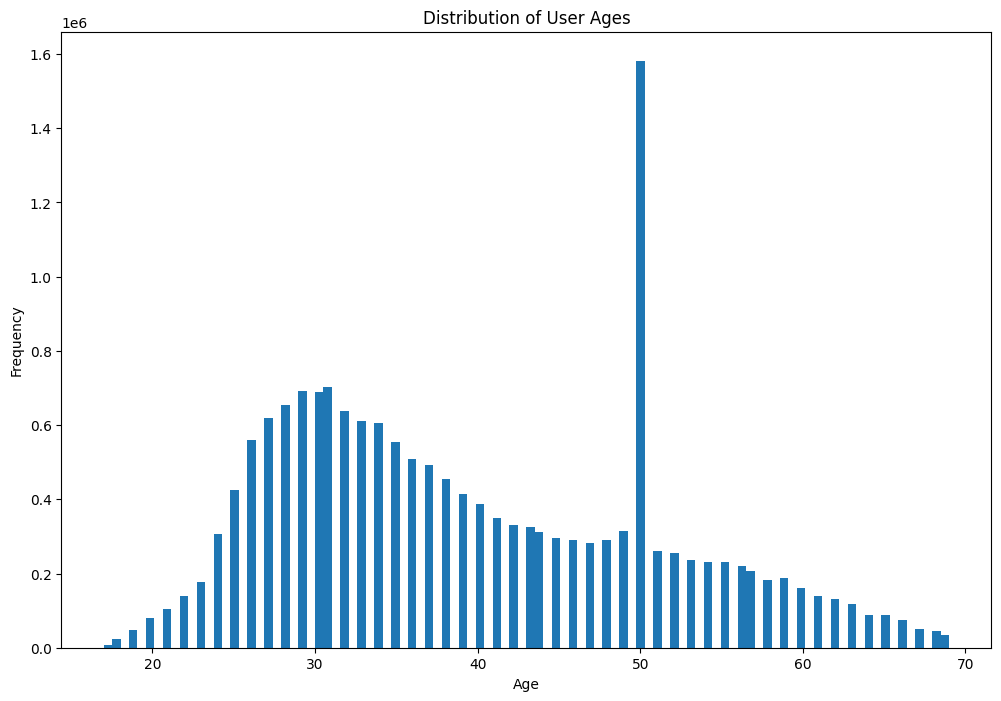

In [68]:
# Age distribution of the users.
plt.figure(figsize=(12, 8))
plt.hist(2019 - df['birth_year'], bins=100)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of User Ages')
plt.savefig(os.path.join('plots', 'age_distribution.png'))
plt.show()


We want to observe the gender distrubution as well.

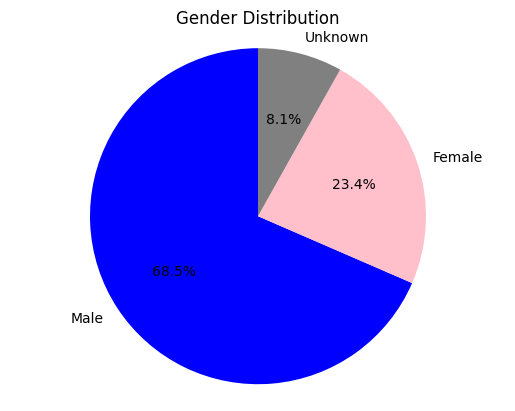

In [69]:
gender_counts = df['gender'].value_counts()

gender_counts

labels = ['Male', 'Female', 'Unknown']
colors = ['blue', 'pink', 'gray']

fig = plt.figure(facecolor='white')
plt.pie(gender_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.title('Gender Distribution')
plt.show()

This marks the completion of the first stage. Now, we have our dataframe in the right format, ready to examine clustering and implement prediction models.

In [14]:
# We save our modified dataframe to a new csv file so we can use it in the following parts.
df.to_csv('Trips_2018_modified.csv', index=False)

# Descriptive study

## Clustering

After cleaning the data we are procceding with the second step.
We apply PCA method to gain insights about the correlation of our features.

In [15]:
# We load our modified dataframe.
df = pd.read_csv('Trips_2018_modified.csv')


ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [16]:
df['tripduration'] = (df['stoptime'] - df['starttime']).dt.total_seconds()


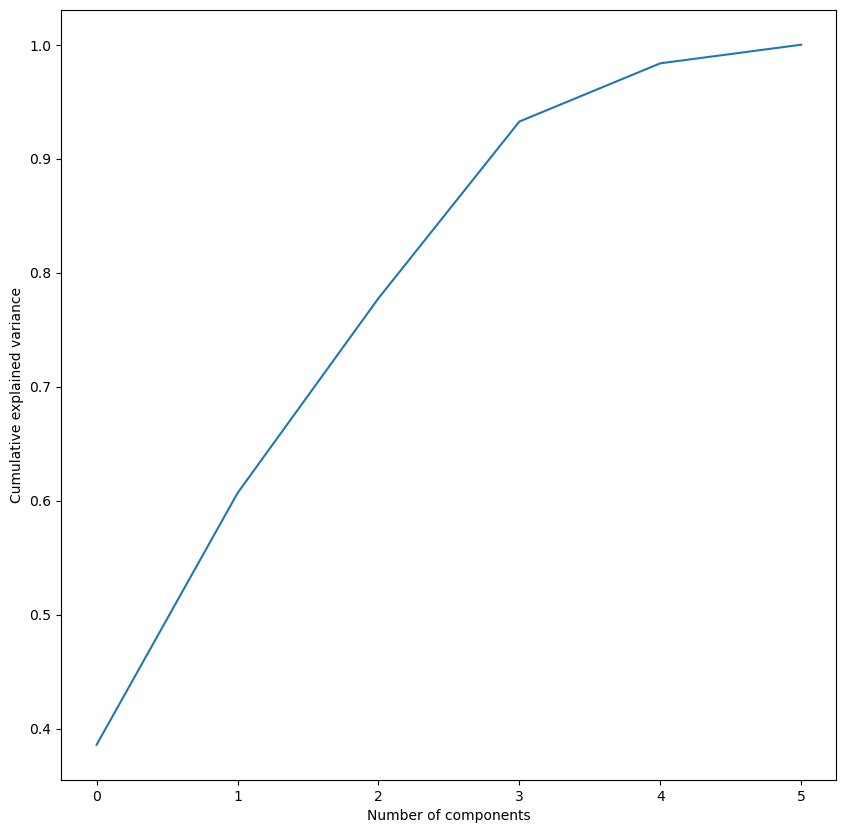


Principal Component 1 Loadings:
end_station_latitude       0.541727
start_station_latitude     0.540553
start_station_longitude    0.454756
end_station_longitude      0.454349
tripduration               0.031408
birth_year                -0.010569
Name: 0, dtype: float64

Principal Component 2 Loadings:
start_station_latitude     0.420023
end_station_latitude       0.417211
tripduration               0.156639
birth_year                -0.331099
start_station_longitude   -0.507287
end_station_longitude     -0.507951
Name: 1, dtype: float64

Principal Component 3 Loadings:
birth_year                 0.527267
end_station_latitude       0.162994
start_station_latitude     0.161146
end_station_longitude     -0.158991
start_station_longitude   -0.160297
tripduration              -0.786436
Name: 2, dtype: float64

Principal Component 4 Loadings:
birth_year                 0.782461
tripduration               0.596639
start_station_latitude     0.077548
end_station_latitude       0.072920
star

In [28]:
# Standardize the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df[['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'birth_year', 'tripduration']])
scaled_df = pd.DataFrame(scaled_df, columns=['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'birth_year', 'tripduration'])

# PCA using all the features
pca = PCA(n_components=6)
pca.fit(scaled_df)
pca_df = pca.transform(scaled_df)
pca_df = pd.DataFrame(pca.components_, columns=['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'birth_year', 'tripduration'])


plt.figure(figsize=(10, 10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.savefig(os.path.join('plots', 'pca_cumulative_explained_variance.png'))
plt.show()

corr_matrix = scaled_df.corr()
corr_matrix['tripduration'].sort_values(ascending=False)

# Print the loadings for each principal component
for i in range(len(pca_df)):
    print(f"\nPrincipal Component {i + 1} Loadings:")
    print(pca_df.iloc[i].sort_values(ascending=False))


It seems that the start_station_latitude , end_station_longitude  contain plethora of information for our problem.       

# Elbow method

In order to identify the optimal number of clusters for the clustering algorithm we chose the elbow method.

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\clust

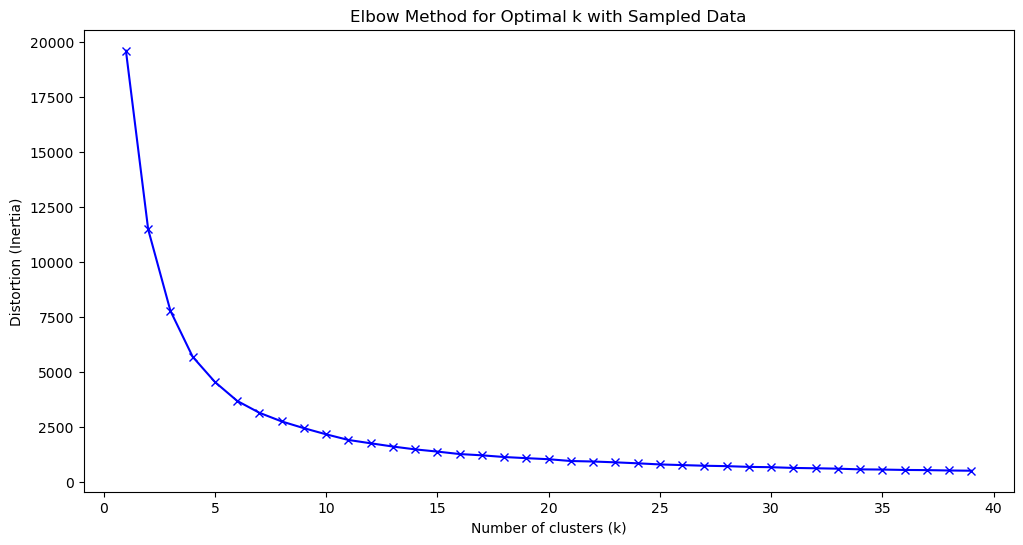

In [9]:
# Extract coordinates from the sample
coordinates_sample = df[['start_station_latitude', 'start_station_longitude']]

#Standardize the coordinates
scaler = StandardScaler()
coordinates_standardized = scaler.fit_transform(coordinates_sample)
# coordinates_sample = coordinates_standardized

#Elbow method
distortions = []
K = range(1, 40)  
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(coordinates_standardized)
    distortions.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(12, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Distortion (Inertia)')
plt.title('Elbow Method for Optimal k with Sampled Data')
plt.show()


Further processing with K-means clustering to remove locations we don't care about.

In [17]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Extract coordinates from the sample
coordinates_start = df[['start_station_latitude', 'start_station_longitude']]
coordinates_end = df[['end_station_latitude', 'end_station_longitude']]

#Standardize the coordinates
scaler = StandardScaler()
coordinates_standardized = scaler.fit_transform(coordinates_start)

# Plot K-means with 20 clusters
kmeans = KMeans(n_clusters=20, random_state=42)
kmeans.fit(coordinates_standardized)
df['cluster'] = kmeans.predict(coordinates_standardized)

# Cluster the data into 20 clusters
kmeans = KMeans(n_clusters=20, init='k-means++', random_state=42).fit(coordinates_start)

# Get the cluster centers
centers = kmeans.cluster_centers_

# Add the cluster labels to the dataframe
df['cluster'] = kmeans.predict(coordinates_start)

Plot the clusters on a map.

In [18]:
import plotly.express as px

def plot_stations_map(stations):
    #First before plotting we have to deal with the outliers 
    #The latitude of New York City is approximately between 40.4774 and 45.01585, and the longitude is approximately between -79.76259 and -71.18507.

    lon_min = -79.76259
    lat_min = 40.4774
    lon_max = -71.18507
    lat_max = 45.01585

    # Store the stations that are within the boundaries
    stations = stations[
        (stations['start_station_latitude'] > lat_min) &
        (stations['start_station_latitude'] < lat_max) &
        (stations['start_station_longitude'] > lon_min) &
        (stations['start_station_longitude'] < lon_max)
    ]
    
    #Plot the stations with an underlying map of New York City
    title = 'Citi Bike Stations in New York City'
    fig = px.scatter_mapbox(
        stations,
        lat='start_station_latitude',
        lon='start_station_longitude',
        color='cluster',
        mapbox_style='carto-positron',
        zoom=9,
        width=1000,
        height=600
    )
    fig.update_layout(
        title=dict(
            text=title,
            x=0.5,  # Center the title horizontally
            xanchor='center',  # Anchor point for horizontal alignment
            font=dict(size=20)
        )
    )
    fig.show()


Remove the locations that are more than 3 standard deviations from the center of the clusters.

In [19]:
# Calculate the distance between each point and its cluster center
distance = kmeans.transform(coordinates_start)

# Get the minimum distance for each point and its cluster index
min_distance = np.min(distance, axis=1)
min_distance_cluster = np.argmin(distance, axis=1)

threshold = 2*np.std(distance,axis=1)

# Get the indices of the points that are within the threshold distance of a cluster center
within_threshold = np.argwhere(min_distance < threshold).flatten()

# Remove the points that are outside the threshold distance of a cluster center
df = df.iloc[within_threshold]

# Plot the stations with an underlying map of New York City.
plot_stations_map(df)
##gb

Find the most important cluster and get all the relevant values from the dataframe based on it (MVC - Most Valuable Cluster).

In [ ]:
df 

In [39]:
# lets save this to a new csv file so we can use it in the next parts.
df.to_csv('Trips_2018_after_clustering.csv', index=False)

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,date,hour,day_of_week,cluster
0,970.752,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1,2018-01-01,13,0,6
1,723.159,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1,2018-01-01,15,0,6
2,496.835,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1,2018-01-01,15,0,6
3,306.819,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1,2018-01-01,15,0,6
4,306.074,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1,2018-01-01,18,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17548334,734.239,2018-12-31 23:55:06.991,2019-01-01 00:07:21.230,336.0,40.730477,-73.999061,379.0,40.749156,-73.991600,27111,Subscriber,1986,1,2018-12-31,23,0,13
17548335,2551.475,2018-12-31 23:55:44.307,2019-01-01 00:38:15.782,3320.0,40.794067,-73.962868,2006.0,40.765909,-73.976342,16390,Customer,1969,0,2018-12-31,23,0,16
17548336,2376.436,2018-12-31 23:56:52.850,2019-01-01 00:36:29.286,427.0,40.701907,-74.013942,259.0,40.701221,-74.012342,34398,Subscriber,1979,1,2018-12-31,23,0,7
17548337,2758.305,2018-12-31 23:58:29.212,2019-01-01 00:44:27.517,3320.0,40.794067,-73.962868,281.0,40.764397,-73.973715,30818,Customer,1969,0,2018-12-31,23,0,16


After identifying clusters based on departure stations, the next step is to determine which cluster exhibits the largest demand in terms of the number of pickups.

In [40]:
# Data preproccesing we keep only theccolumns we need 
columns_to_remove = ['start_station_id', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_latitude','end_station_longitude','bikeid','day_of_week','usertype','birth_year','gender']
df = df.drop(columns=columns_to_remove, axis=1)


In [41]:
#lets drop the index column

df = df.drop(df.columns[0], axis=1)
df

,starttime,stoptime,date,hour,cluster
0,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,2018-01-01,13,6
1,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,2018-01-01,15,6
2,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,2018-01-01,15,6
3,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,2018-01-01,15,6
4,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,2018-01-01,18,6
...,...,...,...,...,...
17548334,2018-12-31 23:55:06.991,2019-01-01 00:07:21.230,2018-12-31,23,13
17548335,2018-12-31 23:55:44.307,2019-01-01 00:38:15.782,2018-12-31,23,16
17548336,2018-12-31 23:56:52.850,2019-01-01 00:36:29.286,2018-12-31,23,7
17548337,2018-12-31 23:58:29.212,2019-01-01 00:44:27.517,2018-12-31,23,16


In [42]:
# We work with the cluster with the largest demand.

larg_cluster = df['cluster'].value_counts().index[0]

df_cluster = df[df['cluster'] == larg_cluster]

# We want to create two timeseries that will describe for hourly intervals the pick up and the dropoffs counts for the one cluster with the largest demand.

df_cluster

,starttime,stoptime,date,hour,cluster
0,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,2018-01-01,13,6
1,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,2018-01-01,15,6
2,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,2018-01-01,15,6
3,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,2018-01-01,15,6
4,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,2018-01-01,18,6
...,...,...,...,...,...
17548278,2018-12-31 23:08:37.580,2018-12-31 23:21:52.444,2018-12-31,23,6
17548296,2018-12-31 23:20:08.627,2018-12-31 23:30:40.567,2018-12-31,23,6
17548320,2018-12-31 23:38:29.436,2018-12-31 23:57:51.375,2018-12-31,23,6
17548321,2018-12-31 23:39:10.727,2018-12-31 23:56:06.692,2018-12-31,23,6


In [44]:
new_column_order = [ 'starttime', 'stoptime', 'date','pickup_hour','dropff_hour','cluster']
df_cluster = df_cluster[new_column_order]
df_cluster

,starttime,stoptime,date,pickup_hour,dropff_hour,cluster
0,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,2018-01-01,13,14,6
1,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,2018-01-01,15,15,6
2,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,2018-01-01,15,15,6
3,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,2018-01-01,15,15,6
4,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,2018-01-01,18,18,6
...,...,...,...,...,...,...
17548278,2018-12-31 23:08:37.580,2018-12-31 23:21:52.444,2018-12-31,23,23,6
17548296,2018-12-31 23:20:08.627,2018-12-31 23:30:40.567,2018-12-31,23,23,6
17548320,2018-12-31 23:38:29.436,2018-12-31 23:57:51.375,2018-12-31,23,23,6
17548321,2018-12-31 23:39:10.727,2018-12-31 23:56:06.692,2018-12-31,23,23,6


In [52]:
# Aggregate data by hour and station for pickups
hourly_pickups = df.groupby(['start_station_id', 'start_date', 'start_hour']).size().reset_index(name='pickups')

# Aggregate data by hour and station for drop-offs
hourly_dropoffs = df.groupby(['end_station_id', 'stop_date', 'stop_hour']).size().reset_index(name='dropoffs')

#df_cluster['pickup_counts'] = df_cluster.groupby('pickup_hour').cumcount() + 1
#df_cluster['dropff_counts'] = df_cluster.groupby('dropff_hour').cumcount() + 1
#df_cluster


,starttime,stoptime,date,pickup_hour,dropff_hour,cluster,pickup_counts,dropff_counts
0,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,2018-01-01,13,14,6,1,1
1,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,2018-01-01,15,15,6,1,1
2,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,2018-01-01,15,15,6,2,2
3,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,2018-01-01,15,15,6,3,3
4,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,2018-01-01,18,18,6,1,1
...,...,...,...,...,...,...,...,...
17548278,2018-12-31 23:08:37.580,2018-12-31 23:21:52.444,2018-12-31,23,23,6,25869,29394
17548296,2018-12-31 23:20:08.627,2018-12-31 23:30:40.567,2018-12-31,23,23,6,25870,29395
17548320,2018-12-31 23:38:29.436,2018-12-31 23:57:51.375,2018-12-31,23,23,6,25871,29396
17548321,2018-12-31 23:39:10.727,2018-12-31 23:56:06.692,2018-12-31,23,23,6,25872,29397


In [50]:
df_cluster.head(20)

,starttime,stoptime,date,pickup_hour,dropff_hour,cluster,pickup_counts,dropff_counts
0,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,2018-01-01,13,14,6,1,1
1,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,2018-01-01,15,15,6,1,1
2,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,2018-01-01,15,15,6,2,2
3,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,2018-01-01,15,15,6,3,3
4,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,2018-01-01,18,18,6,1,1
5,2018-01-01 21:31:54.192,2018-01-01 21:58:36.353,2018-01-01,21,21,6,1,1
6,2018-01-02 07:54:53.646,2018-01-02 08:06:55.872,2018-01-02,7,8,6,1,1
7,2018-01-02 08:06:14.331,2018-01-02 08:13:28.767,2018-01-02,8,8,6,1,2
8,2018-01-02 08:10:15.255,2018-01-02 08:16:21.896,2018-01-02,8,8,6,2,3
9,2018-01-02 08:13:30.896,2018-01-02 08:18:55.120,2018-01-02,8,8,6,3,4


In [53]:
# lets work on pick up timeseries only 

pickup = df_cluster[[ 'starttime', 'pickup_hour','pickup_counts']].copy()
dropoff = df_cluster[[ 'stoptime', 'dropff_hour','dropff_counts']].copy()
pickup = pickup.drop_duplicates('pickup_hour', keep='last')
dropoff = dropoff.drop_duplicates('dropff_hour', keep='last')
pickup.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 17529864 to 17548331
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   starttime      24 non-null     datetime64[ns]
 1   pickup_hour    24 non-null     int32         
 2   pickup_counts  24 non-null     int64         
dtypes: datetime64[ns](1), int32(1), int64(1)
memory usage: 672.0 bytes


In [54]:
# Lets order the timeseries by start time
pickup = pickup.sort_values(by='starttime')
dropoff = dropoff.sort_values(by='stoptime')
pickup.head(20)

,starttime,pickup_hour,pickup_counts
17529864,2018-12-31 00:59:00.966,0,14972
17530062,2018-12-31 01:58:18.753,1,8939
17530187,2018-12-31 02:55:47.107,2,5243
17530236,2018-12-31 03:54:57.545,3,3541
17530294,2018-12-31 04:58:29.417,4,5345
17530475,2018-12-31 05:59:51.982,5,22247
17530975,2018-12-31 06:59:23.815,6,70147
17531924,2018-12-31 07:59:22.491,7,90055
17533577,2018-12-31 08:59:19.157,8,135376
17535224,2018-12-31 09:59:59.063,9,118154


In [31]:
pickup.info()


<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, 353871 to 16853558
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   starttime      23 non-null     datetime64[ns]
 1   pickup_hour    23 non-null     int32         
 2   pickup_counts  23 non-null     int64         
dtypes: datetime64[ns](1), int32(1), int64(1)
memory usage: 644.0 bytes


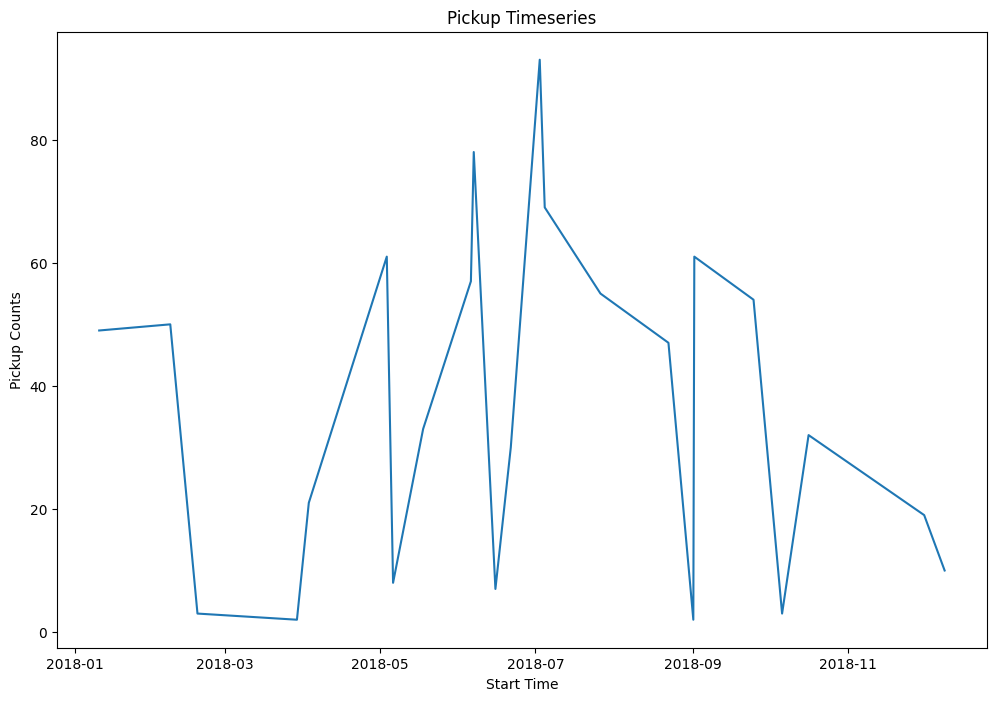

In [30]:
#lets plot the pick up timeseries 
# Plot the pickup timeseries where the x axis is the start time and the y axis is the pickup counts.
plt.figure(figsize=(12, 8))
plt.plot(pickup['starttime'], pickup['pickup_counts'])
plt.xlabel('Start Time')
plt.ylabel('Pickup Counts')
plt.title('Pickup Timeseries')
plt.savefig(os.path.join('plots', 'pickup_timeseries.png'))
plt.show()


In [52]:
# Sort the clusters by the number of trips (instances) in each cluster 
sorted_clusters= df['cluster'].value_counts().idxmax()

# Get the indices of the points that are in the most important cluster
most_important_cluster_indices = np.argwhere(df['cluster'] == sorted_clusters).flatten()

# Get the most important cluster's features
MVC = df.iloc[most_important_cluster_indices].copy()
MVC.info()


 

c:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning:

Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead



<class 'pandas.core.frame.DataFrame'>
Int64Index: 932 entries, 16303534 to 4635301
Data columns (total 17 columns):
tripduration               932 non-null float64
starttime                  932 non-null datetime64[ns]
stoptime                   932 non-null datetime64[ns]
start_station_id           932 non-null float64
start_station_latitude     932 non-null float64
start_station_longitude    932 non-null float64
end_station_id             932 non-null float64
end_station_latitude       932 non-null float64
end_station_longitude      932 non-null float64
bikeid                     932 non-null int64
usertype                   932 non-null object
birth_year                 932 non-null int64
gender                     932 non-null int64
date                       932 non-null object
hour                       932 non-null int64
day_of_week                932 non-null int64
cluster                    932 non-null int32
dtypes: datetime64[ns](2), float64(7), int32(1), int64(5), object(2)

In [53]:
MVC

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,date,hour,day_of_week,cluster
16303534,882.698,2018-11-25 18:21:38.774,2018-11-25 18:36:21.472,423.0,40.765849,-73.986905,476.0,40.743943,-73.979661,20049,Customer,1969,0,2018-11-25,18,6,5
14990281,728.714,2018-10-26 13:05:36.329,2018-10-26 13:17:45.043,524.0,40.755273,-73.983169,3431.0,40.746524,-73.977885,16978,Subscriber,1994,2,2018-10-26,13,4,5
10592885,319.456,2018-08-17 20:20:10.708,2018-08-17 20:25:30.164,3255.0,40.750585,-73.994685,509.0,40.745497,-74.001971,31284,Subscriber,1967,1,2018-08-17,20,4,5
16254150,1152.658,2018-11-23 19:55:41.002,2018-11-23 20:14:53.660,514.0,40.760875,-74.002777,3256.0,40.727714,-74.011296,20011,Subscriber,1988,2,2018-11-23,19,4,5
1997040,364.087,2018-03-06 18:51:24.445,2018-03-06 18:57:28.532,480.0,40.766697,-73.990617,480.0,40.766697,-73.990617,30007,Subscriber,1975,1,2018-03-06,18,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2112453,1273.344,2018-03-17 11:41:44.220,2018-03-17 12:02:57.564,523.0,40.754666,-73.991382,529.0,40.757570,-73.990985,31400,Subscriber,1991,1,2018-03-17,11,5,5
11899070,226.392,2018-09-07 00:04:40.796,2018-09-07 00:08:27.188,479.0,40.760193,-73.991255,495.0,40.762699,-73.993012,19396,Subscriber,1986,2,2018-09-07,0,4,5
10282088,471.371,2018-08-13 00:04:27.812,2018-08-13 00:12:19.183,267.0,40.750977,-73.987654,474.0,40.745168,-73.986831,33315,Customer,1987,1,2018-08-13,0,0,5
12241544,2232.503,2018-09-13 17:23:03.801,2018-09-13 18:00:16.304,515.0,40.760094,-73.994618,3602.0,40.763154,-73.920827,25468,Subscriber,1975,1,2018-09-13,17,3,5


## Predictions

We start with the linear Regression model for predicting the trip duration.

In [77]:
from sklearn.preprocessing import StandardScaler

# Extract the features
features = MVC[['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'hour']]

# Standardize the features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Use the most important cluster's features to fit a Linear Regression (LR) model
from sklearn.linear_model import LinearRegression

# Extract the target variable
target = MVC['tripduration']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_standardized, target, test_size=0.25, random_state=42)

# Fit a Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr.predict(X_test)

error = y_test - y_pred

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)

# Calculate the R^2
r2 = lr.score(X_test, y_test)
print('R^2:', r2)


RMSE: 491.7556743490566
R^2: 0.10324411950529466


For better understanding we plot the Linear Regression model results.

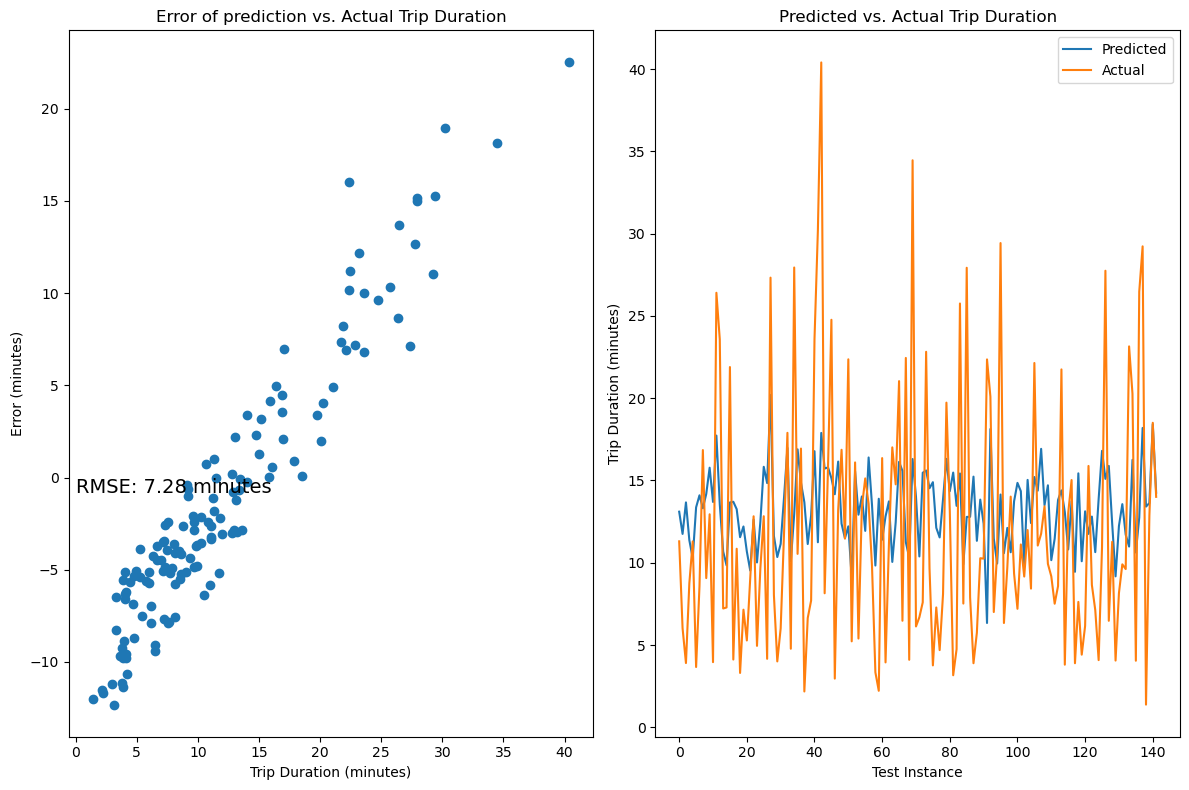

In [40]:
# Plot the error
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.scatter(y_test/60, error/60)
plt.text(0, 0, 'RMSE: {:.2f} minutes'.format(rmse/60), fontsize=14, va='top')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Error (minutes)')
plt.title('Error of prediction vs. Actual Trip Duration')
plt.subplot(1, 2, 2)
plt.plot(y_pred/60, label='Predicted')
plt.plot(y_test.values/60, label='Actual')
plt.xlabel('Test Instance')
plt.ylabel('Trip Duration (minutes)')
plt.title('Predicted vs. Actual Trip Duration')
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join('plots', 'linear_regression.png'))
plt.show()

A second appoach is utilized with a Random Forest model.

In [78]:
from sklearn.ensemble import RandomForestRegressor

# Fit a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)

# Calculate the R^2
r2 = rf.score(X_test, y_test)
print('R^2:', r2)


RMSE: 373.5380326934527
R^2: 0.4825777171498091


Print the Random Forest model results.

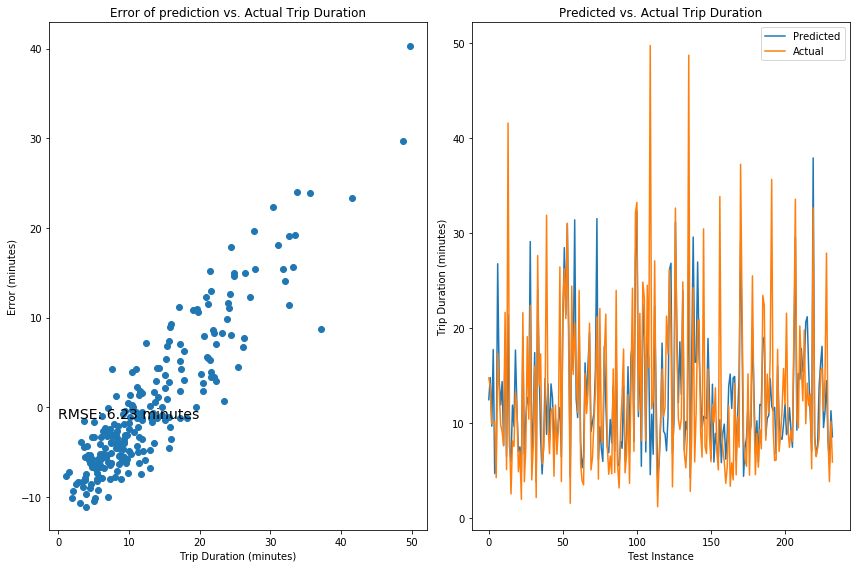

In [79]:
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.scatter(y_test/60, error/60)
plt.text(0, 0, 'RMSE: {:.2f} minutes'.format(rmse/60), fontsize=14, va='top')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Error (minutes)')
plt.title('Error of prediction vs. Actual Trip Duration')
plt.subplot(1, 2, 2)
plt.plot(y_pred/60, label='Predicted')
plt.plot(y_test.values/60, label='Actual')
plt.xlabel('Test Instance')
plt.ylabel('Trip Duration (minutes)')
plt.title('Predicted vs. Actual Trip Duration')
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join('plots', 'random_forest.png'))
plt.show()


Implement Linear tranformation in a neural network

Epoch [10/3000], Loss: 880475.1250
Estimated remaining time: 0.19 minutes
Epoch [20/3000], Loss: 878609.0000
Estimated remaining time: 0.18 minutes


Epoch [30/3000], Loss: 875910.6875
Estimated remaining time: 0.19 minutes
Epoch [40/3000], Loss: 872071.1250
Estimated remaining time: 0.19 minutes
Epoch [50/3000], Loss: 866741.9375
Estimated remaining time: 0.18 minutes
Epoch [60/3000], Loss: 859546.1875
Estimated remaining time: 0.18 minutes
Epoch [70/3000], Loss: 850087.8750
Estimated remaining time: 0.19 minutes
Epoch [80/3000], Loss: 837963.6875
Estimated remaining time: 0.19 minutes
Epoch [90/3000], Loss: 822769.8125
Estimated remaining time: 0.19 minutes
Epoch [100/3000], Loss: 804085.2500
Estimated remaining time: 0.19 minutes
Epoch [110/3000], Loss: 781572.6250
Estimated remaining time: 0.18 minutes
Epoch [120/3000], Loss: 754934.8750
Estimated remaining time: 0.18 minutes
Epoch [130/3000], Loss: 724039.1250
Estimated remaining time: 0.18 minutes
Epoch [140/3000], Loss: 688938.6875
Estimated remaining time: 0.20 minutes
Epoch [150/3000], Loss: 649883.2500
Estimated remaining time: 0.20 minutes
Epoch [160/3000], Loss: 607339.

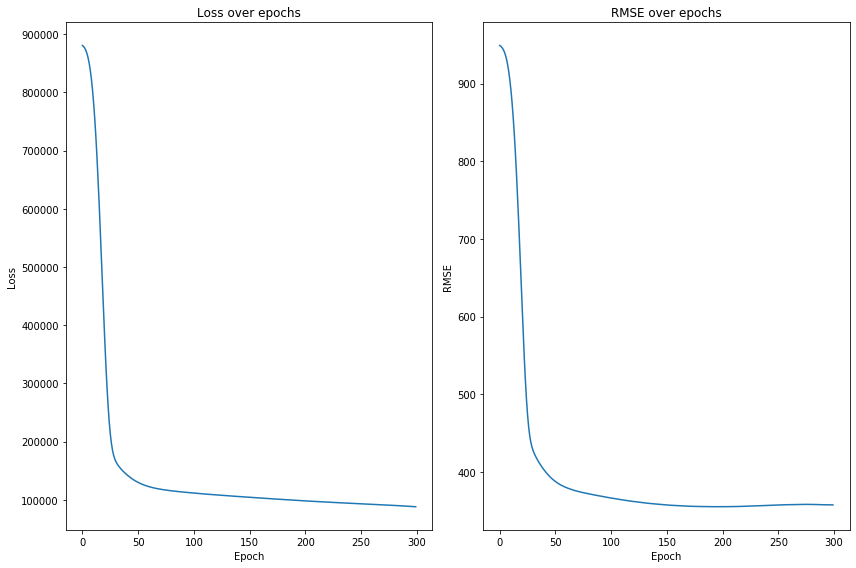

In [80]:
# Extract the features
features = MVC[['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'hour']]

# Standardize the features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Extract the target variable
target = MVC['tripduration']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_standardized, target, test_size=0.2, random_state=42)

# Check if there is a GPU available else run in CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).to(device)

# Neural Network model
class RegressionModel(nn.Module):
    def __init__(self, input_size):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x
    
model = RegressionModel(input_size=X_train.shape[1])

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Evaluation on the test set
def evaluate(model, X_test_tensor, y_test_tensor):    
    with torch.no_grad():
        y_pred_tensor = model(X_test_tensor)
        rmse_nn = torch.sqrt(criterion(y_pred_tensor, y_test_tensor.view(-1, 1)))
        return rmse_nn

# Training the model
epochs = 3000 # Number of epochs
losses = [] # Keep track of the losses over time
rmse_array = []
start_time = time()
for epoch in range(epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor.view(-1, 1))

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print progress
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')
        losses.append(loss.item())
        rmse_nn = evaluate(model, X_test_tensor, y_test_tensor)
        rmse_array.append(rmse_nn.item())
        # Estimate the remaining time
        remaining_time = (time() - start_time) * (epochs - epoch) / (epoch + 1)
        print(f'Estimated remaining time: {remaining_time/60:.2f} minutes')

# Plot the loss over epochs
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over epochs')
plt.subplot(1,2,2)
plt.plot(rmse_array)
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('RMSE over epochs')
plt.tight_layout()
plt.savefig(os.path.join('plots', 'neural_network.png'))
plt.show()



In [81]:
min_rmse = np.min(rmse_array)
print('Minimum possible RMSE:', min_rmse)

# Calculate the R^2
r2 = model.score(X_test_tensor, y_test_tensor)
print('R^2:', r2)




Minimum possible RMSE: 355.3008728027344


AttributeError: 'RegressionModel' object has no attribute 'score'

Create a NN with dropout layers

Epoch [10/2000], Loss: 881574.8125
RMSE: 949.8035
Estimated remaining time: 4.59 minutes
Epoch [20/2000], Loss: 881563.5625
RMSE: 949.8160
Estimated remaining time: 4.58 minutes
Epoch [30/2000], Loss: 881550.2500
RMSE: 949.8029
Estimated remaining time: 4.42 minutes
Epoch [40/2000], Loss: 881563.1250
RMSE: 949.8024
Estimated remaining time: 4.43 minutes
Epoch [50/2000], Loss: 881572.4375
RMSE: 949.8109
Estimated remaining time: 4.31 minutes
Epoch [60/2000], Loss: 881568.7500
RMSE: 949.7814
Estimated remaining time: 4.42 minutes
Epoch [70/2000], Loss: 881561.6250
RMSE: 949.7941
Estimated remaining time: 4.39 minutes
Epoch [80/2000], Loss: 881570.6250
RMSE: 949.7939
Estimated remaining time: 4.38 minutes
Epoch [90/2000], Loss: 881574.2500
RMSE: 949.7783
Estimated remaining time: 4.30 minutes
Epoch [100/2000], Loss: 881564.4375
RMSE: 949.8011
Estimated remaining time: 4.29 minutes
Epoch [110/2000], Loss: 881555.2500
RMSE: 949.7777
Estimated remaining time: 4.26 minutes
Epoch [120/2000], L

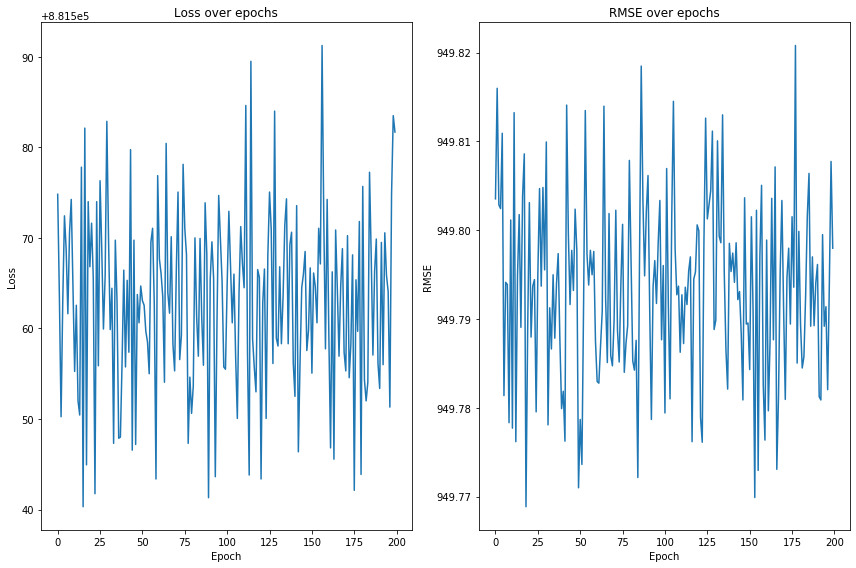

In [72]:
# Standardize the features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features_standardized, target, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Neural Network model with dropout
class EnhancedRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(EnhancedRegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 2048)
        self.relu1 = nn.LeakyReLU(0.2)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(2048, 1024)
        self.relu2 = nn.LeakyReLU(0.2)
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(1024, 512)
        self.relu3 = nn.LeakyReLU(0.2)
        self.dropout3 = nn.Dropout(0.5)
        self.fc4 = nn.Linear(512, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.dropout3(x)
        x = self.fc4(x)
        return x

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Evaluation on the test set
def evaluate(model, X_test_tensor, y_test_tensor):
    with torch.no_grad():
        y_pred_tensor = model(X_test_tensor)
        rmse_nn = torch.sqrt(criterion(y_pred_tensor, y_test_tensor.view(-1, 1)))
        return rmse_nn

# Training the model
epochs = 2000
losses = []  # Keep track of the losses over time
rmse_array = []
start_time = time()

model = EnhancedRegressionModel(input_size=X_train.shape[1])

for epoch in range(epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor.view(-1, 1))

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print progress
    if (epoch + 1) % 10 == 0:
        losses.append(loss.item())
        rmse_nn = evaluate(model, X_test_tensor, y_test_tensor)
        rmse_array.append(rmse_nn.item())
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')
        print(f'RMSE: {rmse_nn.item():.4f}')
        print(f'Estimated remaining time: {(time() - start_time) * (epochs - epoch) / (epoch + 1)/60:.2f} minutes')

# Plot the loss over epochs
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over epochs')
plt.subplot(1, 2, 2)
plt.plot(rmse_array)
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('RMSE over epochs')
plt.tight_layout()
plt.savefig(os.path.join('plots', 'neural_network_dropout.png'))
plt.show()


Another model : LSTM model for predicting the trip duration (Mike's model)

Epoch [10/2000], Loss: 803978.0000
RMSE: 836.5095
Estimated remaining time: 1.67 minutes


Epoch [20/2000], Loss: 594253.0625
RMSE: 742.7735
Estimated remaining time: 1.63 minutes
Epoch [30/2000], Loss: 622402.9375
RMSE: 621.5584
Estimated remaining time: 1.72 minutes
Epoch [40/2000], Loss: 462236.1562
RMSE: 521.9565
Estimated remaining time: 1.58 minutes
Epoch [50/2000], Loss: 331945.2500
RMSE: 487.9136
Estimated remaining time: 1.62 minutes
Epoch [60/2000], Loss: 300702.0312
RMSE: 471.6250
Estimated remaining time: 1.54 minutes
Epoch [70/2000], Loss: 310916.5938
RMSE: 495.8111
Estimated remaining time: 1.54 minutes
Epoch [80/2000], Loss: 385637.6562
RMSE: 483.6770
Estimated remaining time: 1.54 minutes
Epoch [90/2000], Loss: 425031.3438
RMSE: 490.5226
Estimated remaining time: 1.56 minutes
Epoch [100/2000], Loss: 343726.7500
RMSE: 493.1094
Estimated remaining time: 1.54 minutes
Epoch [110/2000], Loss: 335454.8750
RMSE: 472.2828
Estimated remaining time: 1.50 minutes
Epoch [120/2000], Loss: 363417.8750
RMSE: 497.0228
Estimated remaining time: 1.47 minutes
Epoch [130/2000], 

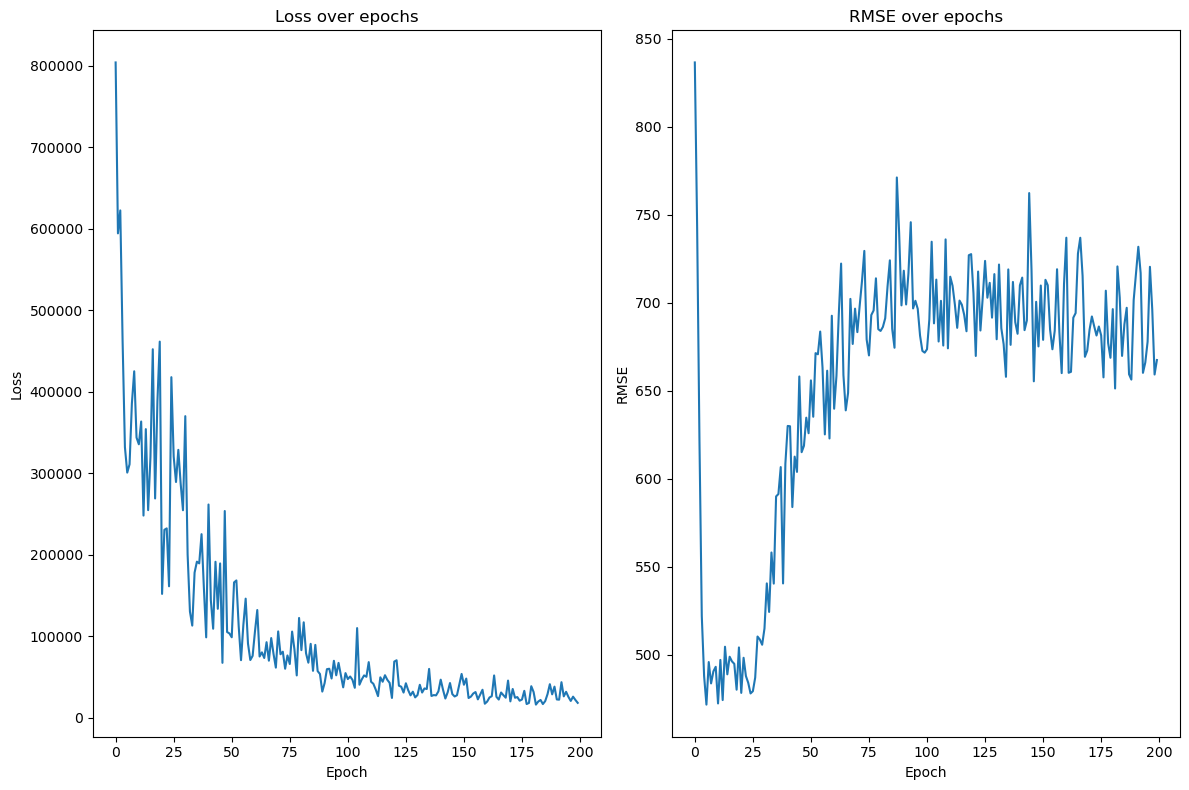

In [46]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

features = MVC[['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'hour']]
target = MVC['tripduration']
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)
X_train, X_test, y_train, y_test = train_test_split(features_standardized, target, test_size=0.2, random_state=42)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Convert the data into sequences
def create_sequences(input_data, target_data, seq_length):
    sequences = []
    target_sequences = []
    for i in range(len(input_data) - seq_length):
        seq = input_data[i:i+seq_length]
        # Using .iloc to access elements by position
        target_seq = target_data.iloc[i + seq_length]  
        sequences.append(seq)
        target_sequences.append(target_seq)
    return np.array(sequences), np.array(target_sequences)

sequence_length = 5
X_train_seq, y_train_seq = create_sequences(X_train, y_train, sequence_length)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, sequence_length)

# Convert to tensors and move to the chosen device
X_train_seq = torch.tensor(X_train_seq, dtype=torch.float32).to(device)
y_train_seq = torch.tensor(y_train_seq, dtype=torch.float32).to(device).view(-1, 1)
X_test_seq = torch.tensor(X_test_seq, dtype=torch.float32).to(device)
y_test_seq = torch.tensor(y_test_seq, dtype=torch.float32).to(device).view(-1, 1)

# Create DataLoader instances
batch_size = 64
train_dataset = TensorDataset(X_train_seq, y_train_seq)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = TensorDataset(X_test_seq, y_test_seq)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_layer_size, output_size, dropout_rate=0.5):
        super(LSTMModel, self).__init__()
        self.lstm1 = nn.LSTM(input_size, hidden_layer_size, batch_first=True)
        self.dropout1 = nn.Dropout(dropout_rate)
        self.lstm2 = nn.LSTM(hidden_layer_size, hidden_layer_size, batch_first=True)
        self.dropout2 = nn.Dropout(dropout_rate)
        self.linear1 = nn.Linear(hidden_layer_size, 64)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(64, output_size)

    def forward(self, x):
        lstm_out, _ = self.lstm1(x)
        lstm_out = self.dropout1(lstm_out)
        lstm_out, _ = self.lstm2(lstm_out)
        lstm_out = self.dropout2(lstm_out)
        lstm_out = lstm_out[:, -1, :]
        out = self.linear1(lstm_out)
        out = self.relu(out)
        predictions = self.linear2(out)
        return predictions

model = LSTMModel(input_size=5, hidden_layer_size=50, output_size=1, dropout_rate=0.5)
model.to(device)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the LSTM model
# Evaluation on the test set
def evaluate(model, X_test_tensor, y_test_tensor):
    with torch.no_grad():
        y_pred_tensor = model(X_test_tensor)
        rmse_nn = torch.sqrt(criterion(y_pred_tensor, y_test_tensor.view(-1, 1)))
        return rmse_nn

# Training the model
epochs = 2000
losses = []  
rmse_array = []
start_time = time()  
for epoch in range(epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()

    # Save the loss and RMSE for plotting every 10 epochs
    if (epoch + 1) % 10 == 0:
        losses.append(loss.item())
        rmse_nn = evaluate(model, X_test_seq, y_test_seq)
        rmse_array.append(rmse_nn.item())
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')
        print(f'RMSE: {rmse_nn.item():.4f}')
        print(f'Estimated remaining time: {(time() - start_time) * (epochs - epoch) / (epoch + 1)/60:.2f} minutes')


# Plot the loss and RMSE over epochs
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over epochs')
plt.subplot(1, 2, 2)
plt.plot(rmse_array)
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('RMSE over epochs')
plt.tight_layout()
plt.savefig(os.path.join('plots', 'lstm_pytorch.png'))
plt.show()

# Save the model
torch.save(model.state_dict(), 'lstm_pytorch_model.pth')


In [47]:
MVC.info()

<class 'pandas.core.frame.DataFrame'>
Index: 707 entries, 10376436 to 14863760
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   tripduration             707 non-null    float64       
 1   starttime                707 non-null    datetime64[ns]
 2   stoptime                 707 non-null    datetime64[ns]
 3   start_station_id         707 non-null    float64       
 4   start_station_latitude   707 non-null    float64       
 5   start_station_longitude  707 non-null    float64       
 6   end_station_id           707 non-null    float64       
 7   end_station_latitude     707 non-null    float64       
 8   end_station_longitude    707 non-null    float64       
 9   bikeid                   707 non-null    int64         
 10  usertype                 707 non-null    object        
 11  birth_year               707 non-null    int64         
 12  gender                   707 

In [49]:
# Convert start and stop times to datetime
MVC['starttime'] = pd.to_datetime(df['starttime'])
MVC['stoptime'] = pd.to_datetime(df['stoptime'])

# Extract hour and date from start and stop times
MVC['start_hour'] = MVC['starttime'].dt.hour
MVC['start_date'] = MVC['starttime'].dt.date
MVC['stop_hour'] = MVC['stoptime'].dt.hour
MVC['stop_date'] = MVC['stoptime'].dt.date

# Aggregate data by hour and station for pickups
hourly_pickups = MVC.groupby(['start_station_id', 'start_date', 'start_hour']).size().reset_index(name='pickups')

# Aggregate data by hour and station for drop-offs
hourly_dropoffs = MVC.groupby(['end_station_id', 'stop_date', 'stop_hour']).size().reset_index(name='dropoffs')

#Handling missing data
# Create a complete range of hours and dates for the dataset
all_hours = pd.date_range(df['starttime'].min(), df['stoptime'].max(), freq='H')
all_stations = MVC['start_station_id'].unique()

# Create a complete DataFrame of hours and stations
complete_data = pd.MultiIndex.from_product([all_stations, all_hours], names=['station_id', 'hour']).to_frame(index=False)

# Convert 'hour' to separate date and hour columns
complete_data['date'] = complete_data['hour'].dt.date
complete_data['hour'] = complete_data['hour'].dt.hour

# Now merge this with the actual data
complete_pickups = pd.merge(complete_data, hourly_pickups, how='left', left_on=['station_id', 'date', 'hour'], right_on=['start_station_id', 'start_date', 'start_hour'])
complete_dropoffs = pd.merge(complete_data, hourly_dropoffs, how='left', left_on=['station_id', 'date', 'hour'], right_on=['end_station_id', 'stop_date', 'stop_hour'])

# Fill missing values with 0
complete_pickups['pickups'].fillna(0, inplace=True)
complete_dropoffs['dropoffs'].fillna(0, inplace=True)
# Merge the pickups and dropoffs data
hourly_data = pd.merge(complete_pickups[['station_id', 'date', 'hour', 'pickups']], complete_dropoffs[['station_id', 'date', 'hour', 'dropoffs']], on=['station_id', 'date', 'hour'])

In [50]:
hourly_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349680 entries, 0 to 349679
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   station_id  349680 non-null  float64
 1   date        349680 non-null  object 
 2   hour        349680 non-null  int32  
 3   pickups     349680 non-null  float64
 4   dropoffs    349680 non-null  float64
dtypes: float64(3), int32(1), object(1)
memory usage: 12.0+ MB


/tmp/ipykernel_74693/1915966445.py:24: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/tmp/ipykernel_74693/1915966445.py:25: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/tmp/ipykernel_74693/1915966445.py:26: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/tmp/ipykernel_74693/1915966445.py:27: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



Training the model...
Epoch [10/2000], Loss: 641801.6875
RMSE: 859.7407
Estimated remaining time: 1.14 minutes
Epoch [10/2000], Loss: 675808.2500
RMSE: 859.7462
Estimated remaining time: 1.15 minutes
Epoch [10/2000], Loss: 914604.0000
RMSE: 859.6310
Estimated remaining time: 1.16 minutes
Epoch [10/2000], Loss: 1093142.1250
RMSE: 859.5175
Estimated remaining time: 1.18 minutes
Epoch [10/2000], Loss: 826224.2500
RMSE: 859.5147
Estimated remaining time: 1.19 minutes
Epoch [10/2000], Loss: 1096893.3750
RMSE: 859.6580
Estimated remaining time: 1.20 minutes
Epoch [10/2000], Loss: 910824.3125
RMSE: 859.4238
Estimated remaining time: 1.21 minutes
Epoch [10/2000], Loss: 832297.8125
RMSE: 859.1511
Estimated remaining time: 1.23 minutes
Epoch [10/2000], Loss: 1096321.0000
RMSE: 859.1737
Estimated remaining time: 1.24 minutes
Epoch [20/2000], Loss: 905527.5625
RMSE: 854.0672
Estimated remaining time: 1.13 minutes
Epoch [20/2000], Loss: 891889.8750
RMSE: 854.2327
Estimated remaining time: 1.14 minu

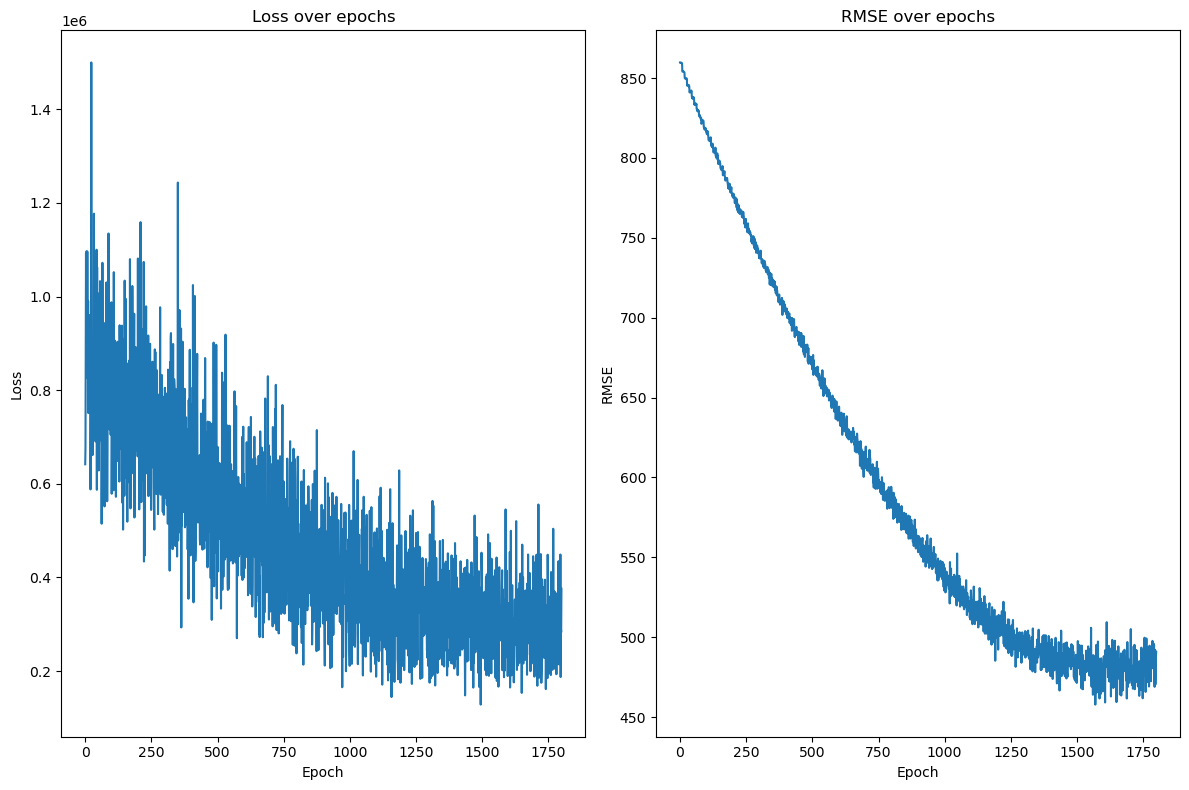

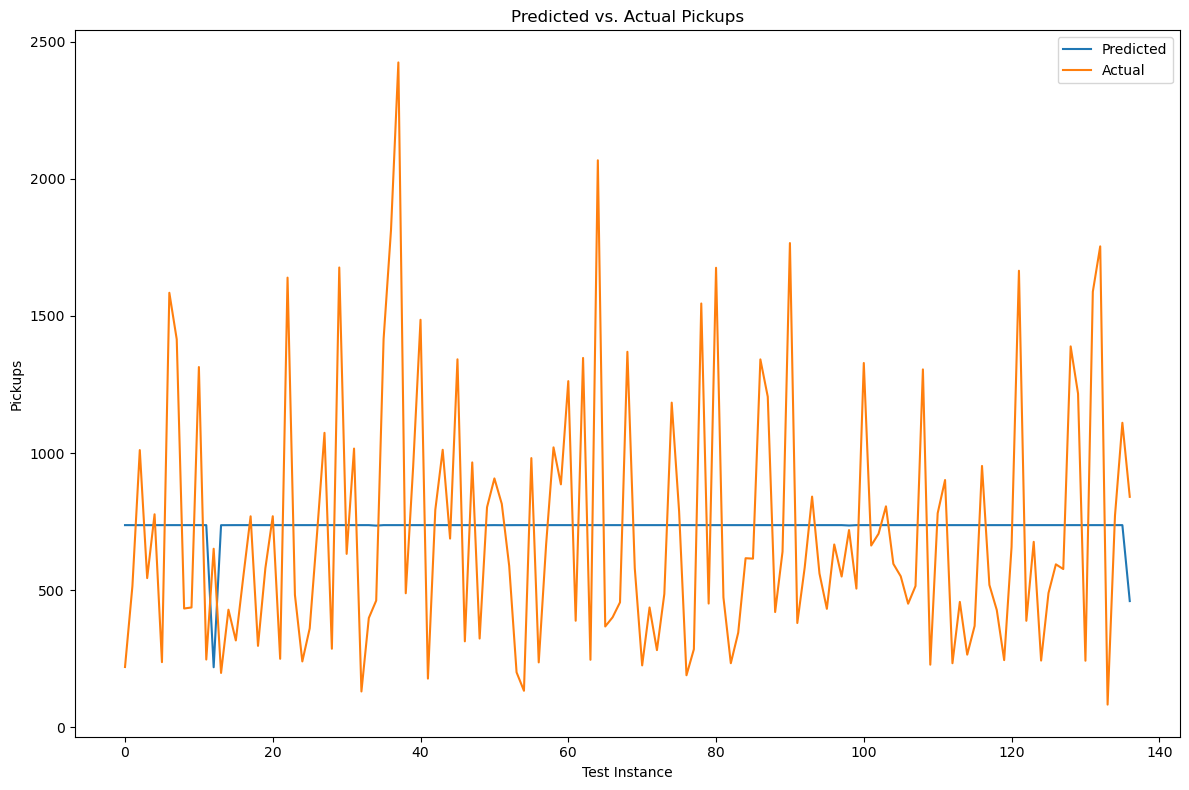

In [53]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import torch.nn as nn
import torch.optim as optim

# Prepare the data
features = hourly_data[['station_id', 'date', 'hour']]
target = hourly_data['pickups']

# Convert categorical features to one-hot encoding
features_encoded = pd.get_dummies(features, columns=['station_id', 'date', 'hour'])

# Standardize the features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features_encoded)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_standardized, target, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_seq, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train_seq, dtype=torch.float32).to(device).view(-1, 1)
X_test_tensor = torch.tensor(X_test_seq, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test_seq, dtype=torch.float32).to(device).view(-1, 1)


# Create DataLoader instances
batch_size = 64
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_layer_size, output_size, dropout_rate=0.5):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_layer_size, batch_first=True)
        self.dropout = nn.Dropout(dropout_rate)
        self.linear = nn.Linear(hidden_layer_size, output_size)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        lstm_out = self.dropout(lstm_out[:, -1, :])
        predictions = self.linear(lstm_out)
        return predictions

# Set the hyperparameters
input_size = X_train.shape[1]
hidden_layer_size = 50
output_size = 1
dropout_rate = 0.5
learning_rate = 0.001
epochs = 2000

# Create the LSTM model
model = LSTMModel(input_size, hidden_layer_size, output_size, dropout_rate)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

rmse_array = []
start_time = time()
losses = []
# Evaluation on the test set
def evaluate(model, X_test_tensor, y_test_tensor):
    with torch.no_grad():
        y_pred_tensor = model(X_test_tensor)
        rmse_nn = torch.sqrt(criterion(y_pred_tensor, y_test_tensor.view(-1, 1)))
        return rmse_nn
    
# Training the LSTM model
print('Training the model...')
for epoch in range(epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch.view(-1, 1))
        loss.backward()
        optimizer.step()

    # Print progress
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')
            rmse_nn = evaluate(model, X_test_tensor, y_test_tensor)
            losses.append(loss.item())
            rmse_array.append(rmse_nn.item())
            print(f'RMSE: {rmse_nn.item():.4f}')
            print(f'Estimated remaining time: {(time() - start_time) * (epochs - epoch) / (epoch + 1)/60:.2f} minutes')

# Plot the loss and RMSE over epochs
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over epochs')
plt.subplot(1, 2, 2)
plt.plot(rmse_array)
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('RMSE over epochs')
plt.tight_layout()
plt.savefig(os.path.join('plots', 'lstm_pytorch_pickups.png'))
plt.show()

# Save the model
torch.save(model.state_dict(), 'lstm_pytorch_pickups_model.pth')

# Plot the predictions vs. actual
model.eval()
with torch.no_grad():
    y_pred_tensor = model(X_test_tensor)
    y_pred = y_pred_tensor.cpu().numpy()
    y_test = y_test_tensor.cpu().numpy()
    plt.figure(figsize=(12, 8))
    plt.plot(y_pred, label='Predicted')
    plt.plot(y_test, label='Actual')
    plt.xlabel('Test Instance')
    plt.ylabel('Pickups')
    plt.title('Predicted vs. Actual Pickups')
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join('plots', 'lstm_pytorch_pickups_predictions.png'))
    plt.show()

print('Finished!')
